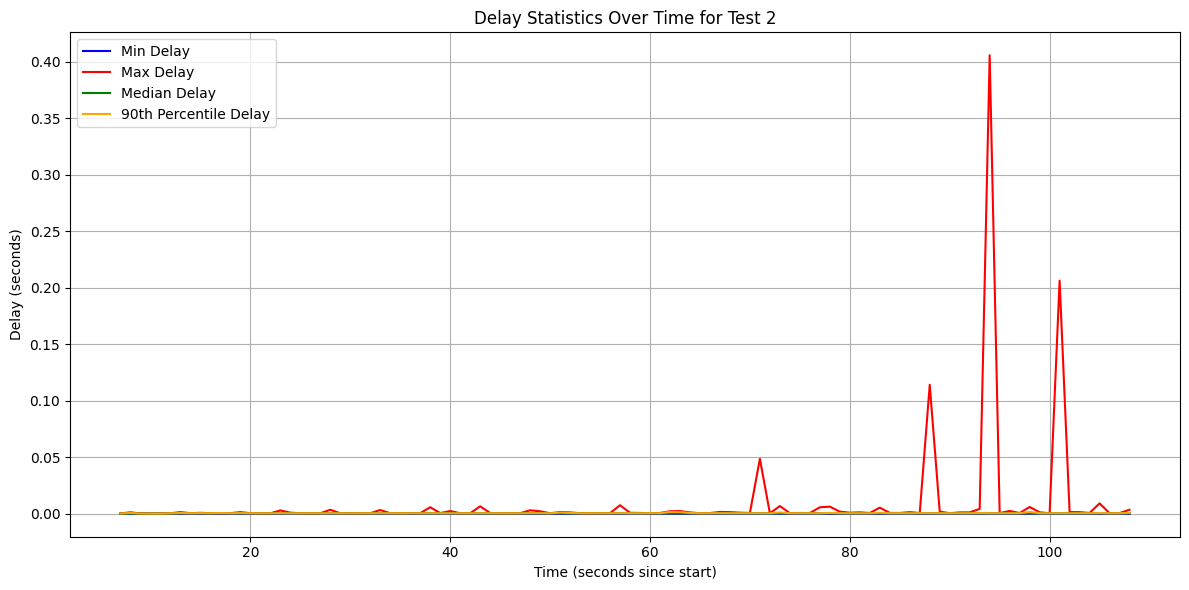

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Read the starting time from the first line of the log file
with open('../server/test_2.txt', 'r') as file:
    first_line = file.readline().strip()
    start_time = float(first_line.split()[-1])

# Read data from log file, starting from the second line
with open('../server/test_2.txt', 'r') as file:
    lines = file.readlines()[1:]

# Parse data
timestamps = []
data = []
for line in lines:
    parts = line.strip().split()
    timestamp_logger = float(parts[0])
    timestamp_event = float(parts[1])
    delay = timestamp_logger - timestamp_event
    timestamps.append(timestamp_logger - start_time)  # Adjusted timestamp
    data.append(delay)

# Create lists to store delay statistics
min_delays = []
max_delays = []
median_delays = []
percentile90_delays = []
timestamps_grouped = []
current_second = None
delay_bucket = []

# Calculate delay statistics for each second
for i in range(len(timestamps)):
    timestamp = timestamps[i]
    delay = data[i]
    if current_second is None:
        current_second = int(timestamp)
    if int(timestamp) == current_second:
        delay_bucket.append(delay)
    else:
        if delay_bucket:
            min_delays.append(min(delay_bucket))
            max_delays.append(max(delay_bucket))
            median_delays.append(np.median(delay_bucket))
            percentile90_delays.append(np.percentile(delay_bucket, 90))
            timestamps_grouped.append(current_second)  # Use seconds since start as x-axis value
        else:
            min_delays.append(0)
            max_delays.append(0)
            median_delays.append(0)
            percentile90_delays.append(0)
            timestamps_grouped.append(current_second)  # Use seconds since start as x-axis value
        current_second = int(timestamp)
        delay_bucket = [delay]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(timestamps_grouped, min_delays, label='Min Delay', color='blue')
plt.plot(timestamps_grouped, max_delays, label='Max Delay', color='red')
plt.plot(timestamps_grouped, median_delays, label='Median Delay', color='green')
plt.plot(timestamps_grouped, percentile90_delays, label='90th Percentile Delay', color='orange')

plt.xlabel('Time (seconds since start)')
plt.ylabel('Delay (seconds)')
plt.title('Delay Statistics Over Time for Test 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()